#                                                                                                                       ZOMATO API PROJECT  

#### IMPORTING MODULES AND LIBRARIES

In [156]:
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import requests
import json

## Plotting the bar graph of number of restaurants present in Delhi NCR vs Rest of India.

In [205]:
# Getting Count for Rest of INDIA Restaurants
df = pd.read_csv("csv files/zomato.csv")
Rest_India = df[(df['Country Code'] == 1) & (df ['City'] != 'New Delhi') & (df ['City'] != 'Ghaziabad') & (df ['City'] != 'Noida') & (df ['City'] != 'Gurgaon') & (df ['City'] !=  'Faridabad')]
Rest_India_count = len(Rest_India)

# Getting Count for Delhi NCR Restaurants
Delhi_NCR = df[(df['Country Code'] == 1) & ((df ['City'] == 'New Delhi')  | (df ['City'] == 'Ghaziabad') | (df ['City'] == 'Noida') | (df ['City'] == 'Gurgaon') | (df ['City'] ==  'Faridabad'))]
#Delhi_NCR_count = len(Delhi_NCR)

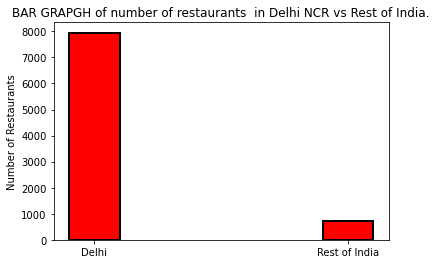

The number of restaurants present in delhi are 7947 and in Rest of India are 705


In [220]:
# Plotting BAR GRAPGH of number of restaurants present in Delhi NCR vs Rest of India.
y = ('Delhi', 'Rest of India')
x = (Delhi_NCR_count, Rest_India_count)
plt.bar(y,x , color = 'red', edgecolor = 'black' , width = 0.2, linewidth=2)
plt.title('BAR GRAPGH of number of restaurants  in Delhi NCR vs Rest of India.')
plt.ylabel('Number of Restaurants')
plt.show()
# Result
print('The number of restaurants present in delhi are',Delhi_NCR_count, 'and in Rest of India are',Rest_India_count)

## Finding  cuisines which are not present in restaurant of Delhi NCR but present in rest of India.

In [206]:
# List of Cuisines in Delhi NCR
Delhi = Delhi_NCR['Cuisines'].str.split(',', expand =True)
Delhi_1 = pd.melt(Delhi)
Delhi_2 = Delhi_1['value'].str.strip()
Delhi_Cuisines = Delhi_2.unique()
Delhi_Cuisines = np.array(Delhi_Cuisines) 

# List of Cuisines in Rest of INDIA
Rest = Rest_India['Cuisines'].str.split(',', expand =True)
Rest_1 = pd.melt(Rest)
Rest_2 = Rest_1['value'].str.strip()
Rest_Cuisines = Rest_2.unique()
Rest_India_Cuisines = np.array(Rest_Cuisines)
a = np.isin(Rest_India_Cuisines,Delhi_Cuisines)
ExclusiveRest_India_Cuisines = Rest_India_Cuisines[~a]
print('Cuisines that are not served in Delhi NCR region according to dataset')
for i in ExclusiveRest_India_Cuisines:
    print(i)
print()
print('-----------------------------------------------------------------------')

#Checking using Zomato API whether this cuisines are actually not served in restaurants of Delhi-NCR.
user_key = 'generated_api_key' # fill generated_api_key
headers ={'user-key': '50f61f47dc8929c91d96b64a70d11c2d','Accept':'application/json'}
params={'city_id': 1}
r=requests.get('https://developers.zomato.com/api/v2.1/cuisines', headers = h, params = params)
py=r.json()
d = []
for i in py.get('cuisines'):
    d.append(i.get('cuisine').get('cuisine_name'))
API_Delhi_Cuisine = np.array(d)
API_Delhi_Cuisine # All cuisines present in zomato API for DELHI NCR

print('Results from ZOMATO API-the cuisines are present in DELHI NCR but not in the zomato.csv')
Delhi_API_Cuisine = np.isin(API_Delhi_Cuisine, Delhi_Cuisines)
cuisines_not_in_dataset = API_Delhi_Cuisine[~Delhi_API_Cuisine]
for i in cuisines_not_in_dataset:
    print(i)
print('-----------------------------------------------------------------------')

print('These are the actual cuisines are actually not served in Delhi NCR (according to Zomato API) and served in rest of india')
b = np.isin(ExclusiveRest_India_Cuisines,API_Delhi_Cuisine, invert = True)
final = ExclusiveRest_India_Cuisines[b]
for i in final:
    print(i)

Cuisines that are not served in Delhi NCR region according to dataset
Malwani
German
BBQ
Cajun

-----------------------------------------------------------------------
Results from ZOMATO API-the cuisines are present in DELHI NCR but not in the zomato.csv
Afghan
BBQ
Bar Food
Brazilian
Bubble Tea
Cantonese
Charcoal Chicken
Coffee
Egyptian
Ethiopian
Frozen Yogurt
Grocery
Himachali
Hot dogs
Israeli
Jamaican
Kebab
Mishti
Momos
Odia
Oriental
Paan
Panini
Pasta
Poké
Roast Chicken
Rolls
Russian
Sindhi
Singaporean
Tamil
Wraps
-----------------------------------------------------------------------
These are the actual cuisines are actually not served in Delhi NCR (according to Zomato API) and served in rest of india
Malwani
German
Cajun


## Find the top 10 cuisines served by maximum number of restaurants in Delhi NCR and rest of India.

Top 10 cuisines in Delhi NCR:
North Indian
Chinese
Fast Food
Mughlai
Bakery
South Indian
Continental
Desserts
Street Food
Italian

-----------------------------------------------------------------------------

Top 10 cuisines in Rest Of India:
North Indian
Chinese
Continental
Italian
Cafe
Fast Food
South Indian
Mughlai
Desserts
Mexican


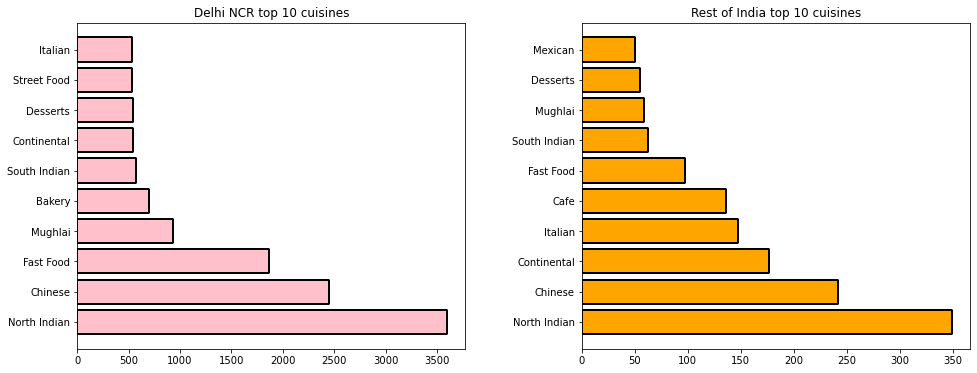

In [218]:
# Top ten Delhi NCR Cuisines
Cuisines = Delhi_2.value_counts()
# Getting top ten cuisines in Delhi NCR
Top_Cuisines = Cuisines.index[:10]  # Cuisine Names
Top_D_Values = Cuisines.values[:10]# Cuisine Values
print('Top 10 cuisines in Delhi NCR:')
for i in Top_Cuisines :
    print(i)
print()
print('-----------------------------------------------------------------------------')
print()
# Top ten Rest Of INDIA Cuisines
R_Cuisines = Rest_2.value_counts() 
# Getting top ten cuisines in rest of india
Top_R_Cuisines = R_Cuisines.index[:10] # Cuisine Names
Top_R_Values = R_Cuisines.values[:10]# Cuisine Values
print('Top 10 cuisines in Rest Of India:')
for i in Top_R_Cuisines :
    print(i)
#######
# Plotting bargraph for comparison between Delhi NCR and rest of india
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))
# Create the bargraph on the first position with the given configurations
bar_1 = axes[0].barh(Top_Cuisines, Top_D_Values,color='pink',edgecolor='black',linewidth=2,joinstyle='bevel')
# Define this plot title
axes[0].set_title('Delhi NCR top 10 cuisines')
# Create the bar graph on the second position with the given configurations
bar_2 = axes[1].barh(Top_R_Cuisines,Top_R_Values,color='orange', edgecolor='black',linewidth=2,joinstyle='bevel')
# Define this plot title
axes[1].set_title('Rest of India top 10 cuisines')
plt.subplots_adjust(wspace=.3)
plt.show()

   #    Understanding User Rating of a Restaurant 

## Analysis to find the influence of number of votes on user rating

In [336]:
## Importing dataset of all restaurants in country india
Restaurants = df[(df['Country Code'] == 1)]

X-axis represent the No. of votes (interval)recieved by the restaurant (in the particular rating interval)
Y-Axis represent the Frequency of no.of votes i.e number of restaurants recieved that no. of votes(interval)


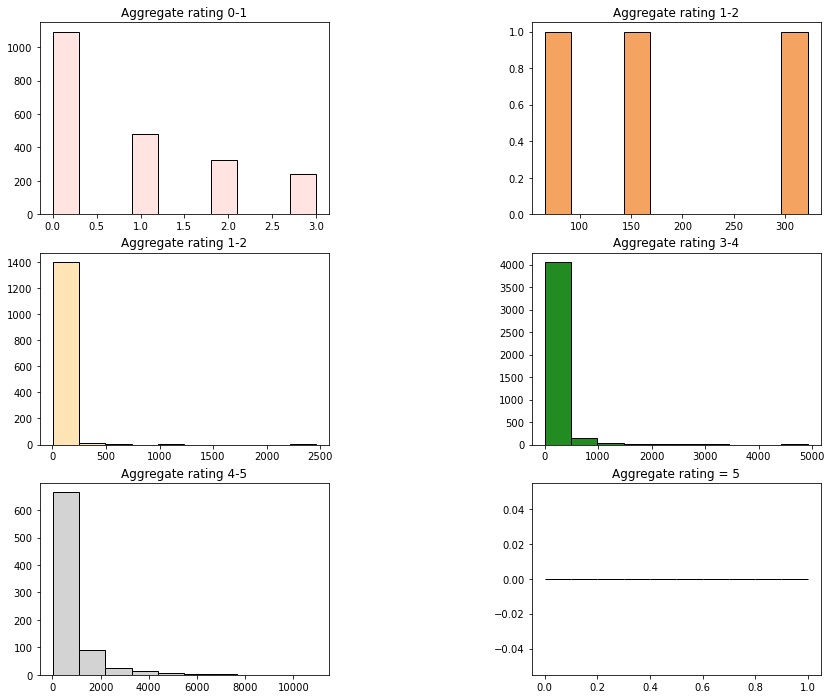

********************************************************************************
Detailed Analysis:
Aggregate rating increases with number of votes that a restaurant is having.


In [342]:
# Getting value of votes lying for Aggregate rating equal to 5
Filt_0 = (Restaurants['Aggregate rating'] == 5)
REST_N_0 = Restaurants.loc[Filt_0, ['Votes']]
Rest_Votes_FI = REST_N_0['Votes'].values
# Getting value of votes lying for Aggregate rating lying between 4 and 5
Filt_1 = (Restaurants['Aggregate rating'] >= 4) & (Restaurants['Aggregate rating'] < 5)
REST_N_1 = Restaurants.loc[Filt_1, ['Votes']]
Rest_Votes_F = REST_N_1['Votes'].values
# Getting value of votes lying for Aggregate rating lying between 3 and 4
Filt_2 = (Restaurants['Aggregate rating'] >= 3) & (Restaurants['Aggregate rating'] < 4)
REST_N_2 = Restaurants.loc[Filt_2, ['Votes']]
Rest_Votes_T = REST_N_2['Votes'].values
# Getting value of votes lying for Aggregate rating lying between 2 and 3
Filt_3 = (Restaurants['Aggregate rating'] >= 2) & (Restaurants['Aggregate rating'] < 3)
REST_N_3 = Restaurants.loc[Filt_3, ['Votes']]
Rest_Votes_S = REST_N_3['Votes'].values
# Getting value of votes lying for Aggregate rating lying between 1 and 2
Filt_4 = (Restaurants['Aggregate rating'] >= 1) & (Restaurants['Aggregate rating'] < 2)
REST_N_4 = Restaurants.loc[Filt_4, ['Votes']]
Rest_Votes_O = REST_N_4['Votes'].values
# Getting value of votes lying for Aggregate rating lying between 0 and 1
Filt_5 = (Restaurants['Aggregate rating'] >= 0) & (Restaurants['Aggregate rating'] < 1)
REST_N_5 = Restaurants.loc[Filt_5, ['Votes']]
Rest_Votes_Z = REST_N_5['Votes'].values

## Plotting Histogram to show  Votes vs frequency of votes for a particular rating
print('X-axis represent the No. of votes (interval)recieved by the restaurant (in the particular rating interval)')
print('Y-Axis represent the Frequency of no.of votes i.e number of restaurants recieved that no. of votes(interval)')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
hist1 = axes[0][0].hist(Rest_Votes_Z, color='mistyrose', edgecolor='black')
axes[0][0].set_title('Aggregate rating 0-1')
axes[0][0].set_xlabel('')
hist2 = axes[0][1].hist(Rest_Votes_O, color='sandybrown', edgecolor='black')
axes[0][1].set_title('Aggregate rating 1-2')
hist3 = axes[1][0].hist(Rest_Votes_S, color='moccasin', edgecolor='black')
axes[1][0].set_title('Aggregate rating 1-2')
hist4 = axes[1][1].hist(Rest_Votes_T,color='forestgreen',edgecolor='black')
axes[1][1].set_title('Aggregate rating 3-4')
hist5 = axes[2][0].hist(Rest_Votes_F,color='lightgrey', edgecolor='black')
axes[2][0].set_title('Aggregate rating 4-5')
hist6 = axes[2][1].hist(Rest_Votes_FI, color='ghostwhite', edgecolor='black')
axes[2][1].set_title('Aggregate rating = 5')
plt.subplots_adjust(wspace=0.7)
plt.show()
print('********************************************************************************')
print('Detailed Analysis:')
print('Aggregate rating increases with number of votes that a restaurant is having.')

## Analysis To find the effect of the Restaurant serving more number of cuisines on the average rating of restaurant.

X-axis represent the No. of cuisines served by the restaurant (in the particular rating interval)
Y-Axis represent the Frequency of no.of cuisines (number of restaurants serving that no. of cuisines)


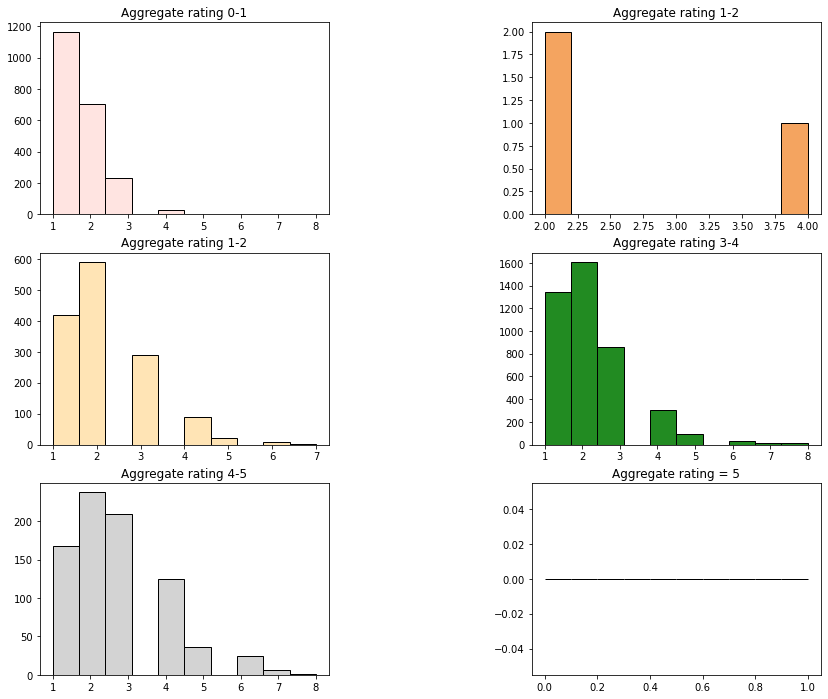

*******************************************************************************
Detailed Analysis:
In general trend is that the as average rating increases their is upward increase in number of restaurant serving more cuisines
For average rating lying between 0 and 1 maximum of restaurants are having the average cost less than 3.
While average rating lying between 4 and 5 some of restaurants are having the number of cuisines even as high as 6 to 8.


In [341]:
# defining a function to convert split cuisines
def convert(x):
    l = x.split(',')
    count = len(l)
    return count
####
# Getting value of votes lying for Aggregate rating equal to 5
Filt_0 = (Restaurants['Aggregate rating'] == 5)
REST_N_0 = Restaurants.loc[Filt_0, ['Cuisines']]
REST_N_0 = REST_N_0['Cuisines'].apply(convert)
Rest_Votes_FI = REST_N_0.values
# Getting value of votes lying for Aggregate rating lying between 4 and 5
Filt_1 = (Restaurants['Aggregate rating'] >= 4) & (Restaurants['Aggregate rating'] < 5)
REST_N_1 = Restaurants.loc[Filt_1, ['Cuisines']]
REST_N_1 = REST_N_1['Cuisines'].apply(convert)
Rest_Votes_F = REST_N_1.values
# Getting value of votes lying for Aggregate rating lying between 3 and 4
Filt_2 = (Restaurants['Aggregate rating'] >= 3) & (Restaurants['Aggregate rating'] < 4)
REST_N_2 = Restaurants.loc[Filt_2, ['Cuisines']]
REST_N_2 = REST_N_2['Cuisines'].apply(convert)
Rest_Votes_T = REST_N_2.values
# Getting value of votes lying for Aggregate rating lying between 2 and 3
Filt_3 = (Restaurants['Aggregate rating'] >= 2) & (Restaurants['Aggregate rating'] < 3)
REST_N_3 = Restaurants.loc[Filt_3, ['Cuisines']]
REST_N_3 = REST_N_3['Cuisines'].apply(convert)
Rest_Votes_S = REST_N_3.values
# Getting value of votes lying for Aggregate rating lying between 1 and 2
Filt_4 = (Restaurants['Aggregate rating'] >= 1) & (Restaurants['Aggregate rating'] < 2)
REST_N_4 = Restaurants.loc[Filt_4, ['Cuisines']]
REST_N_4 = REST_N_4['Cuisines'].apply(convert)
Rest_Votes_O = REST_N_4.values
# Getting value of votes lying for Aggregate rating lying between 0 and 1
Filt_5 = (Restaurants['Aggregate rating'] >= 0) & (Restaurants['Aggregate rating'] < 1)
REST_N_5 = Restaurants.loc[Filt_5, ['Cuisines']]
REST_N_5 = REST_N_5['Cuisines'].apply(convert)
Rest_Votes_Z = REST_N_5.values

## Plotting Histogram to show  Votes vs frequency of votes for a particular rating
print('X-axis represent the No. of cuisines served by the restaurant (in the particular rating interval)')
print('Y-Axis represent the Frequency of no.of cuisines (number of restaurants serving that no. of cuisines)')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
hist1 = axes[0][0].hist(Rest_Votes_Z, color='mistyrose', edgecolor='black')
axes[0][0].set_title('Aggregate rating 0-1')
axes[0][0].set_xlabel('')
hist2 = axes[0][1].hist(Rest_Votes_O, color='sandybrown', edgecolor='black')
axes[0][1].set_title('Aggregate rating 1-2')
hist3 = axes[1][0].hist(Rest_Votes_S, color='moccasin', edgecolor='black')
axes[1][0].set_title('Aggregate rating 1-2')
hist4 = axes[1][1].hist(Rest_Votes_T,color='forestgreen',edgecolor='black')
axes[1][1].set_title('Aggregate rating 3-4')
hist5 = axes[2][0].hist(Rest_Votes_F,color='lightgrey', edgecolor='black')
axes[2][0].set_title('Aggregate rating 4-5')
hist6 = axes[2][1].hist(Rest_Votes_FI, color='ghostwhite', edgecolor='black')
axes[2][1].set_title('Aggregate rating = 5')
plt.subplots_adjust(wspace=0.7)
plt.show()
print("*******************************************************************************")
print('Detailed Analysis:')
print('In general trend is that the as average rating increases their is upward increase in number of restaurant serving more cuisines')
print('For average rating lying between 0 and 1 maximum of restaurants are having the average cost less than 3.')
print('While average rating lying between 4 and 5 some of restaurants are having the number of cuisines even as high as 6 to 8.')

## Analysis To find the influence of Average cost for two of the restaurant on the Average rating of restaurant

X-axis represent the Average Cost for two of the restaurant (in the particular rating interval)
Y-Axis represent the Frequency of Average Cost for two i.e number of restaurants having that Average Cost for two


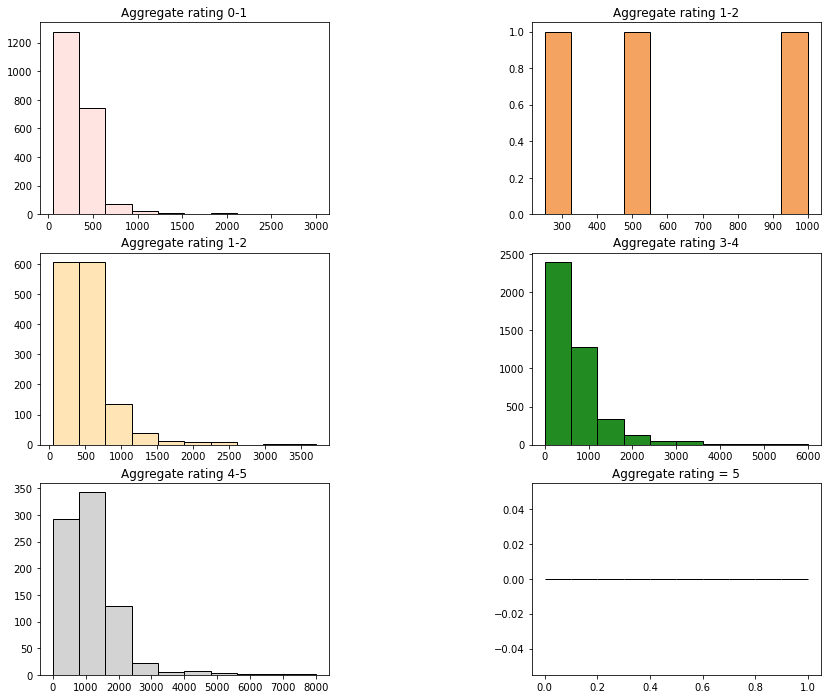

****************************************************************************
Detailed Analysis:
In general trend is that the as average rating increases their is upward push in average cost of two.
For average rating lying between 0 and 1 maximum of restaurants are having the average cost less than 500.
While average rating lying between 4 and 5 maximum of restaurants are having the average cost betwen 1000 and 2000.


In [338]:
# Getting value of Average cost of two  for Aggregate rating equal to 5
Filt_0 = (Restaurants['Aggregate rating'] == 5)
REST_N_0 = Restaurants.loc[Filt_0, ['Average Cost for two']]
Rest_Votes_FI = REST_N_0['Average Cost for two'].values
# Getting value of Average cost of two  for Aggregate rating lying between 4 and 5
Filt_1 = (Restaurants['Aggregate rating'] >= 4) & (Restaurants['Aggregate rating'] < 5)
REST_N_1 = Restaurants.loc[Filt_1, ['Average Cost for two']]
Rest_Votes_F = REST_N_1['Average Cost for two'].values
# Getting value of Average cost of two  for Aggregate rating lying between 3 and 4
Filt_2 = (Restaurants['Aggregate rating'] >= 3) & (Restaurants['Aggregate rating'] < 4)
REST_N_2 = Restaurants.loc[Filt_2, ['Average Cost for two']]
Rest_Votes_T = REST_N_2['Average Cost for two'].values
# Getting value of Average cost of two  for Aggregate rating lying between 2 and 3
Filt_3 = (Restaurants['Aggregate rating'] >= 2) & (Restaurants['Aggregate rating'] < 3)
REST_N_3 = Restaurants.loc[Filt_3, ['Average Cost for two']]
Rest_Votes_S = REST_N_3['Average Cost for two'].values
# Getting value of Average cost of two  for Aggregate rating lying between 1 and 2
Filt_4 = (Restaurants['Aggregate rating'] >= 1) & (Restaurants['Aggregate rating'] < 2)
REST_N_4 = Restaurants.loc[Filt_4, ['Average Cost for two']]
Rest_Votes_O = REST_N_4['Average Cost for two'].values
# Getting value of Average cost of two  for Aggregate rating lying between 0 and 1
Filt_5 = (Restaurants['Aggregate rating'] >= 0) & (Restaurants['Aggregate rating'] < 1)
REST_N_5 = Restaurants.loc[Filt_5, ['Average Cost for two']]
Rest_Votes_Z = REST_N_5['Average Cost for two'].values

## Plotting Histogram to show  Votes vs frequency of votes for a particular rating
print('X-axis represent the Average Cost for two of the restaurant (in the particular rating interval)')
print('Y-Axis represent the Frequency of Average Cost for two i.e number of restaurants having that Average Cost for two')
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
hist1 = axes[0][0].hist(Rest_Votes_Z, color='mistyrose', edgecolor='black')
axes[0][0].set_title('Aggregate rating 0-1')
axes[0][0].set_xlabel('')
hist2 = axes[0][1].hist(Rest_Votes_O, color='sandybrown', edgecolor='black')
axes[0][1].set_title('Aggregate rating 1-2')
hist3 = axes[1][0].hist(Rest_Votes_S, color='moccasin', edgecolor='black')
axes[1][0].set_title('Aggregate rating 1-2')
hist4 = axes[1][1].hist(Rest_Votes_T,color='forestgreen',edgecolor='black')
axes[1][1].set_title('Aggregate rating 3-4')
hist5 = axes[2][0].hist(Rest_Votes_F,color='lightgrey', edgecolor='black')
axes[2][0].set_title('Aggregate rating 4-5')
hist6 = axes[2][1].hist(Rest_Votes_FI, color='ghostwhite', edgecolor='black')
axes[2][1].set_title('Aggregate rating = 5')
plt.subplots_adjust(wspace=0.7)
plt.show()
print('****************************************************************************')
print('Detailed Analysis:')
print('In general trend is that the as average rating increases their is upward push in average cost of two.')
print('For average rating lying between 0 and 1 maximum of restaurants are having the average cost less than 500.')
print('While average rating lying between 4 and 5 maximum of restaurants are having the average cost betwen 1000 and 2000.')

## Restaurant serving some specific cuisines.

In [421]:
# Getting value of Average cost of two  for Aggregate rating lying between 4 and 5
Filt_1 = (Restaurants['Aggregate rating'] >= 4) & (Restaurants['Aggregate rating'] < 5)
REST_N_1 = Restaurants.loc[Filt_1, ['Cuisines']]
Final_Cuisines = REST_N_1['Cuisines'].str.split(',', expand =True)
Final_Cuisines_1 = pd.melt(Final_Cuisines)
Final_Cuisines_2 = Final_Cuisines_1['value']
Final_Cuisines_2.reset_index(drop = True, inplace = True)
###
# Getting value of Average cost of two  for Aggregate rating lying between 2 and 3
Filt_3 = (Restaurants['Aggregate rating'] >= 2) & (Restaurants['Aggregate rating'] < 3)
REST_N_3 = Restaurants.loc[Filt_3, ['Cuisines']]
Final_Cuisines_3 = REST_N_3['Cuisines'].str.split(',', expand =True)
Final_Cuisines_4 = pd.melt(Final_Cuisines_3)
Final_Cuisines_5 = Final_Cuisines_4['value']
Final_Cuisines_5.reset_index(drop = True, inplace = True)
#####
Final_Cuisines_5 = np.array(Final_Cuisines_5.unique())
Final_Cuisines_2 = np.array(Final_Cuisines_2.unique())
b = np.isin(Final_Cuisines_2, Final_Cuisines_5)
final = Final_Cuisines_2[~b]
## Comparing particular levels of aggregate ratings.
## Aggregate rating is equal to 4.9
Filt_5 = (Restaurants['Aggregate rating'] == 4.9)
REST_N_4 = Restaurants.loc[Filt_5, ['Cuisines']]
Final_Cuisines_6 = REST_N_4['Cuisines'].str.split(',', expand =True)
Final_Cuisines_7 = pd.melt(Final_Cuisines_6)
Final_Cuisines_8 = Final_Cuisines_7['value']
### Aggregate rating is equal to 3.8
Filt_6 = (Restaurants['Aggregate rating'] == 3.8)
REST_N_5 = Restaurants.loc[Filt_6, ['Cuisines']]
Final_Cuisines_9 = REST_N_5['Cuisines'].str.split(',', expand =True)
Final_Cuisines_10 = pd.melt(Final_Cuisines_9)
Final_Cuisines_11 = Final_Cuisines_10['value']
Final_Cuisines_8 = np.array(Final_Cuisines_8.unique())
Final_Cuisines_11 = np.array(Final_Cuisines_11.unique())
b = np.isin(Final_Cuisines_8, Final_Cuisines_11)
final_1 = Final_Cuisines_8[~b]
###
print('Exclusive Cuisines for Aggregate Rating lying between 4 & 5:')
for i in final:
    print(i)
print()
print('Exclusive Cuisines for Aggregate Rating 4.9:')
for i in final_1:
    print(i)
print()
print('******************************************************************************')
print("Detailed Analysis")
print("For overall level of comparision between ratings lying between 4 & 5 and 2 & 3. Aggregate Rating 4 & 5 Category have some exclusive type of cuisines so exclusivity affects rating level.")
print("For  level of comparision between ratings  between 4.9 and  3.8. Aggregate Rating 4.9  have some exclusive type of cuisines so exclusivity affects rating level.")

Exclusive Cuisines for Aggregate Rating lying between 4 & 5:
Rajasthani
Modern Indian
Mediterranean
Mexican
Parsi
Seafood
Persian
Portuguese
Healthy Food
Juices
Korean
Thai
Greek
Kerala
Tex-Mex
Malaysian
Nepalese
Sushi
Vietnamese
Naga
Spanish
Salad
Charcoal Grill
 Mediterranean
 Charcoal Grill
 French
 Goan
 Burmese
 African
 Iranian
 Juices
 Lucknowi
 Sushi
 Andhra
 Awadhi
 Kerala
 Middle Eastern
 Indonesian
 British
 Mangalorean
 Modern Indian
 North Eastern
 German
 Steak
 Spanish
 Parsi
 Korean
 Bihari
 Greek
 Sri Lankan
 Gujarati

Exclusive Cuisines for Aggregate Rating 4.9:
Modern Indian
 Lucknowi

******************************************************************************
Detailed Analysis
For overall level of comparision between ratings lying between 4 & 5 and 2 & 3. Aggregate Rating 4 & 5 Category have some exclusive type of cuisines so exclusivity affects rating level.
For  level of comparision between ratings  between 4.9 and  3.8. Aggregate Rating 4.9  have some exclusiv

In [409]:
Filt_1 = (Restaurants['Aggregate rating'] == 4.9)
REST_N_1 = Restaurants.loc[Filt_1, ['Cuisines']]
Final_Cuisines = REST_N_1['Cuisines'].str.split(',', expand =True)
Final_Cuisines_1 = pd.melt(Final_Cuisines)
Final_Cuisines_2 = Final_Cuisines_1['value']
Filt_2 = (Restaurants['Aggregate rating'] == 3.8)
REST_N_2 = Restaurants.loc[Filt_2, ['Cuisines']]
Final_Cuisines = REST_N_2['Cuisines'].str.split(',', expand =True)
Final_Cuisines_3 = pd.melt(Final_Cuisines)
Final_Cuisines_4 = Final_Cuisines_3['value']
Final_Cuisines_4 = np.array(Final_Cuisines_4.unique())
Final_Cuisines_2 = np.array(Final_Cuisines_2.unique())
b = np.isin(Final_Cuisines_2, Final_Cuisines_4)
final = Final_Cuisines_2[~b]
final

array(['Modern Indian', ' Lucknowi'], dtype=object)

##  Top 10 localities with more weighted restaurant rating.
Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [321]:
d = []
# Getting the dataset for weighted ratings
for i, row in  Restaurants.iterrows():
    d .append(row['Votes'] * row['Aggregate rating'])   # appending the value of votes * Aggregate rating for each row in dataset
Restaurants['weighted'] = d
Weights = Restaurants.groupby('Locality')['Votes'].sum()
WGrouped = Restaurants.groupby('Locality')['weighted'].sum()
F = np.divide(WGrouped,Weights)
Final = F.sort_values(ascending = False)[:10]
index = Final.index
values = Final.values
print("Top ten localities:-")
for i in range(10):
    print(index[i],'has wieghted rating of', values[i],'.')

Top ten localities:-
Hotel Clarks Amer, Malviya Nagar has wieghted rating of 4.9 .
Aminabad has wieghted rating of 4.9 .
Friends Colony has wieghted rating of 4.886916367367881 .
Powai has wieghted rating of 4.841868613138686 .
Kirlampudi Layout has wieghted rating of 4.820161290322581 .
Deccan Gymkhana has wieghted rating of 4.8 .
Express Avenue Mall,  Royapettah has wieghted rating of 4.8 .
Banjara Hills has wieghted rating of 4.7187617260787995 .
Sector 5, Salt Lake has wieghted rating of 4.707022552098202 .
Riverside Mall, Gomti Nagar has wieghted rating of 4.7 .


# Visualization

##  Bar graph top 15 restaurants have a maximum number of outlets. 

Top 15 restaurants have a maximum number of outlets:-
Cafe Coffee Day has 83 outlets
Domino's Pizza has 79 outlets
Subway has 63 outlets
Green Chick Chop has 51 outlets
McDonald's has 48 outlets
Keventers has 34 outlets
Pizza Hut has 29 outlets
Giani has 29 outlets
Baskin Robbins has 28 outlets
Barbeque Nation has 25 outlets
Dunkin' Donuts has 22 outlets
Giani's has 22 outlets
Barista has 22 outlets
Costa Coffee has 20 outlets
Pind Balluchi has 20 outlets

****************************************************************************************


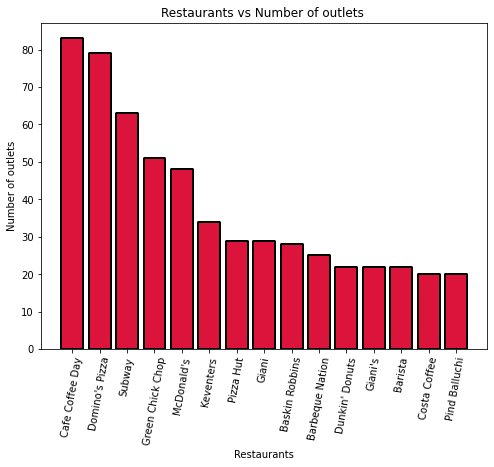

In [293]:
# Getting dataset for restaurants having maximum outlets
F = Restaurants['Restaurant Name'].value_counts()
# Getting names of top 15 restaurants have a maximum number of outlets
index = F.index[:15]
# Getting values of top 15 restaurants have a maximum number of outlets
values =F.values[:15]
print('Top 15 restaurants have a maximum number of outlets:-')
for i in range(15):
    print(index[i], 'has', values[i], 'outlets')
print()
print('****************************************************************************************')
plt.figure(figsize=(8,6))
plt.bar(index, values, color='crimson', edgecolor='black', linewidth=2,joinstyle='bevel')
plt.xticks(rotation= 80)
plt.title('Restaurants vs Number of outlets ')
plt.xlabel('Restaurants')
plt.ylabel('Number of outlets')
plt.show()


## Histogram of aggregate rating of restaurant.

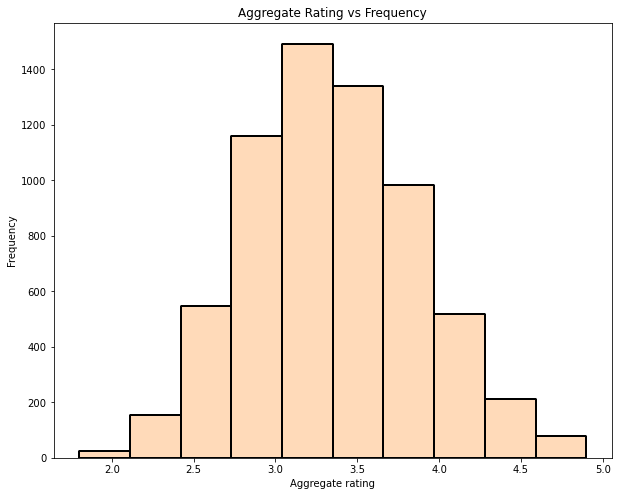

In [332]:
# Getting dataset for restaurants aggregate ratings
#index = Restaurants[Restaurants['Aggregate rating']== 0].index
#Restaurants.drop(index,inplace = True)
Rating = Restaurants['Aggregate rating']
plt.figure(figsize=(10,8))
plt.hist(Rating ,color= 'peachpuff', histtype="barstacked", edgecolor="black", linewidth=2, joinstyle="bevel")
plt.title('Aggregate Rating vs Frequency')
plt.xlabel('Aggregate rating')
plt.ylabel('Frequency')
plt.show()

## Bar graph of top 10 restaurants in the data with the highest number of votes.

Top 10 restaurants with highest number of votes
Toit has 10934
Truffles has 9667
Hauz Khas Social has 7931
Peter Cat has 7574
AB's - Absolute Barbecues has 6907
Barbeque Nation has 5966
Big Brewsky has 5705
AB's - Absolute Barbecues has 5434
The Black Pearl has 5385
BarBQ has 5288

****************************************************************************************


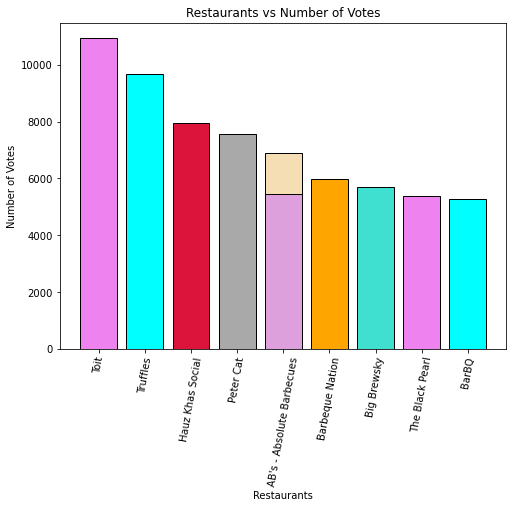

In [347]:
# Getting dataset for restaurants having maximum Votes
F = Restaurants['Votes']
# Getting dataset for restaurants with name
S = Restaurants['Restaurant Name']
# merging two series 
H = pd.concat([F,S], axis = 1)
H.sort_values(by ='Votes', ascending = False, inplace =True)
Votes = H['Votes'][:10].values
Rest_name = H['Restaurant Name'][:10].values
print("Top 10 restaurants with highest number of votes")
for i in range(10):
    print(Rest_name[i],'has',Votes[i])
print()
print('****************************************************************************************')
plt.figure(figsize=(8,6))
plt.bar(Rest_name,Votes,color=['violet','aqua','crimson','darkgray','wheat','orange', 'turquoise','plum'], edgecolor='black', linewidth=1, joinstyle='bevel')
plt.xticks(rotation= 80)
plt.title('Restaurants vs Number of Votes')
plt.xlabel('Restaurants')
plt.ylabel('Number of Votes')
plt.show()

## Plot the pie graph of top 10 cuisines present in restaurants in the USA. 

Top 10 cuisines present in restaurants in the USA:-
American is served in 112 restaurants.
 Seafood is served in 45 restaurants.
 Sandwich is served in 44 restaurants.
 Steak is served in 38 restaurants.
 Pizza is served in 33 restaurants.
 Sushi is served in 32 restaurants.
Mexican is served in 30 restaurants.
Italian is served in 27 restaurants.
 Burger is served in 26 restaurants.
Japanese is served in 24 restaurants.

****************************************************************************************


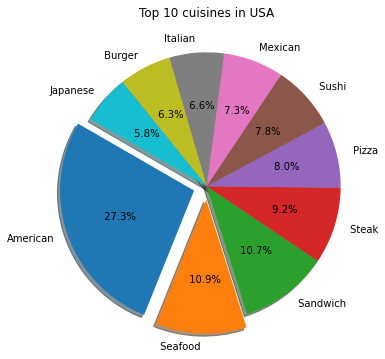

In [304]:
USA = df[(df['Country Code'] == 216)]
Cuisines = USA['Cuisines'].str.split(',', expand =True)
Cuisines_1 = pd.melt(Cuisines)
Top_Cuisines = Cuisines_1['value'].value_counts()[:10]
Cuisines_names = Top_Cuisines.index
Cuisines_count = Top_Cuisines.values
print('Top 10 cuisines present in restaurants in the USA:-')
for i in range(10):
    print(Cuisines_names[i],'is served in',Cuisines_count[i],'restaurants.')
print()
print('****************************************************************************************')

plt.figure(figsize=(6,6))
plt.axis("equal")
plt.title("Top 10 cuisines in USA")
plt.pie(Cuisines_count,labels = Cuisines_names,startangle = 150,shadow=True, explode = (0.1,0.1,0,0,0,0,0,0,0,0), autopct =" %.1f%%")
plt.show()

##  Bubble graph of a number of Restaurants present in the city of India.

<ipython-input-408-4cb274e62409>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Restaurants['weighted'] = d


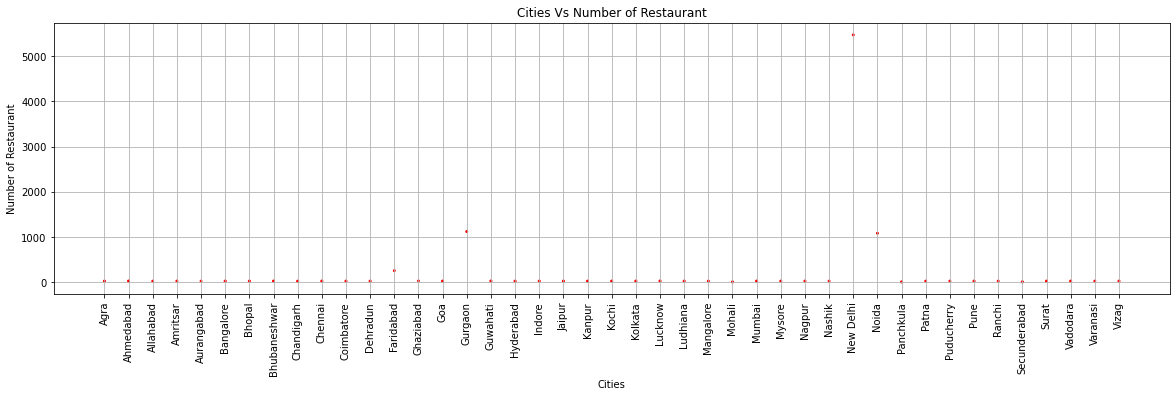

In [408]:
# Getting the dataset for weighted ratings for each individual city
d = []
for i, row in  Restaurants.iterrows():
    d .append(row['Votes'] * row['Aggregate rating'])   # appending the value of votes * Aggregate rating for each row in dataset
Restaurants['weighted'] = d
Weights = Restaurants.groupby('City')['Votes'].sum()
WGrouped = Restaurants.groupby('City')['weighted'].sum()
F = np.divide(WGrouped,Weights)
index = Final.index
values = Final.values
Restaurant_City = Restaurants['City'].value_counts()
Final = pd.concat([F,Restaurant_City], axis = 1,keys=['Weighted Ratings','Number of restaurants'])
cities = Final.index
num_rest = Final['Number of restaurants']
weighted_rating = Final['Weighted Ratings']
plt.figure(figsize=(20,5))
plt.scatter(cities,num_rest,s=weighted_rating,c='r',alpha=1)
plt.xticks(rotation = 90)
plt.title('Cities Vs Number of Restaurant')
plt.xlabel('Cities')
plt.ylabel('Number of Restaurant')
plt.grid()
plt.show()